##Import Libraries



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



##Load and Explore Dataset

In [ ]:
def load_and_explore_data():
    iris = load_iris()
    X = iris.data
    y = iris.target
    print("Feature names:", iris.feature_names)
    print("Target classes:", iris.target_names)
    print("\nSample data:\n", pd.DataFrame(X, columns=iris.feature_names).head())
    return X, y, iris.target_names, iris

X, y, target_names, iris = load_and_explore_data()


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


###Plot class distribution

/tmp/ipython-input-15-2654745329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_names, y=class_counts.values, palette="viridis")


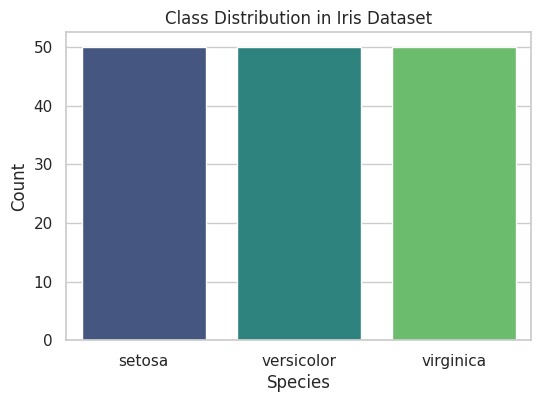

In [ ]:
def plot_class_distribution(y, target_names):
    class_counts = pd.Series(y).value_counts().sort_index()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=target_names, y=class_counts.values, palette="viridis")
    plt.title("Class Distribution in Iris Dataset")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.show()

plot_class_distribution(y, target_names)

###Split dataset

In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

X_train, X_test, y_train, y_test = split_data(X, y)

In [ ]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train, y_train)
    return model

model = train_logistic_regression(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


###Evaluate model

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



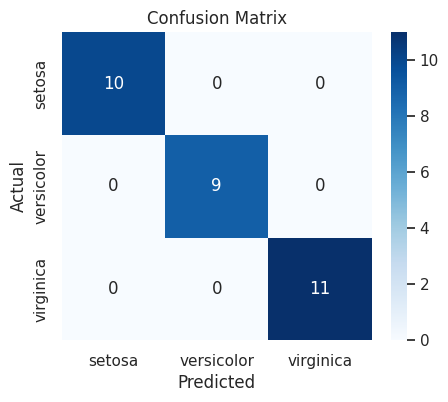

Model Accuracy: 100.00%


In [ ]:
def evaluate_model(model, X_test, y_test, target_names):
    y_pred = model.predict(X_test)

    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    acc = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {acc * 100:.2f}%")

evaluate_model(model, X_test, y_test, target_names)


##Decision Boundaries

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


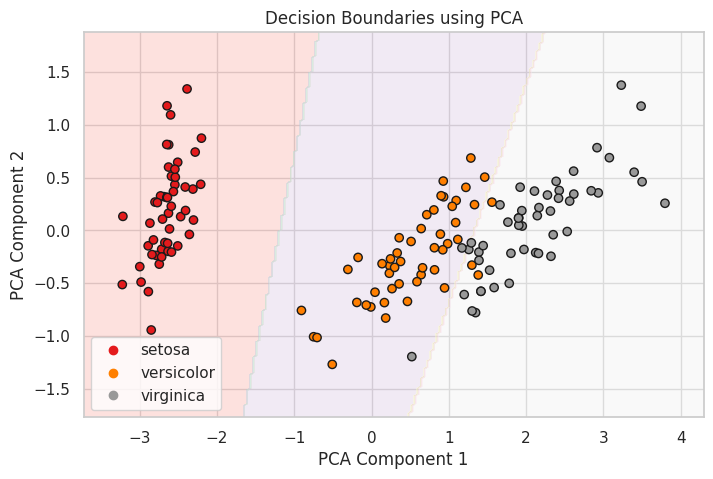

In [ ]:

from sklearn.decomposition import PCA

def plot_decision_boundary(model, X, y, target_names):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    model_2d = LogisticRegression(max_iter=200, multi_class='multinomial')
    model_2d.fit(X_pca, y)

    x_min, x_max = X_pca[:, 0].min() - .5, X_pca[:, 0].max() + .5
    y_min, y_max = X_pca[:, 1].min() - .5, X_pca[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', edgecolor='k')
    plt.title("Decision Boundaries using PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(handles=scatter.legend_elements()[0], labels=list(target_names))

    plt.show()

plot_decision_boundary(model, X, y, target_names)
